In [1]:
import cv2
import numpy as np
from geometry_classes import Point, Line
from skimage.util import random_noise
from sklearn.metrics import mean_squared_error
from utility_funcs import *
import matplotlib.pyplot as plt

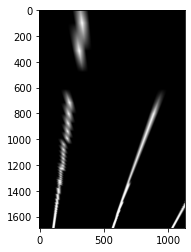

Wrong number of lines
416 83 13 377


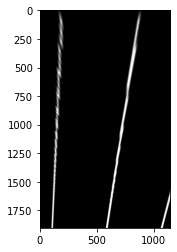

Wrong number of lines
755 3 11 370


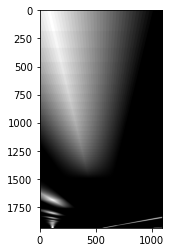

Wrong number of lines
894 146 13 367
orig:  5.486999999999945  mean:  61.558999999999955


In [2]:
res = n_tests(1000)

In [3]:
import csv

f = open('res.csv', 'w')

writer = csv.writer(f)

writer.writerow(('orig_score', 'mean_score'))

for row in res:
    writer.writerow(row)

f.close()

In [4]:
res = np.array(res)

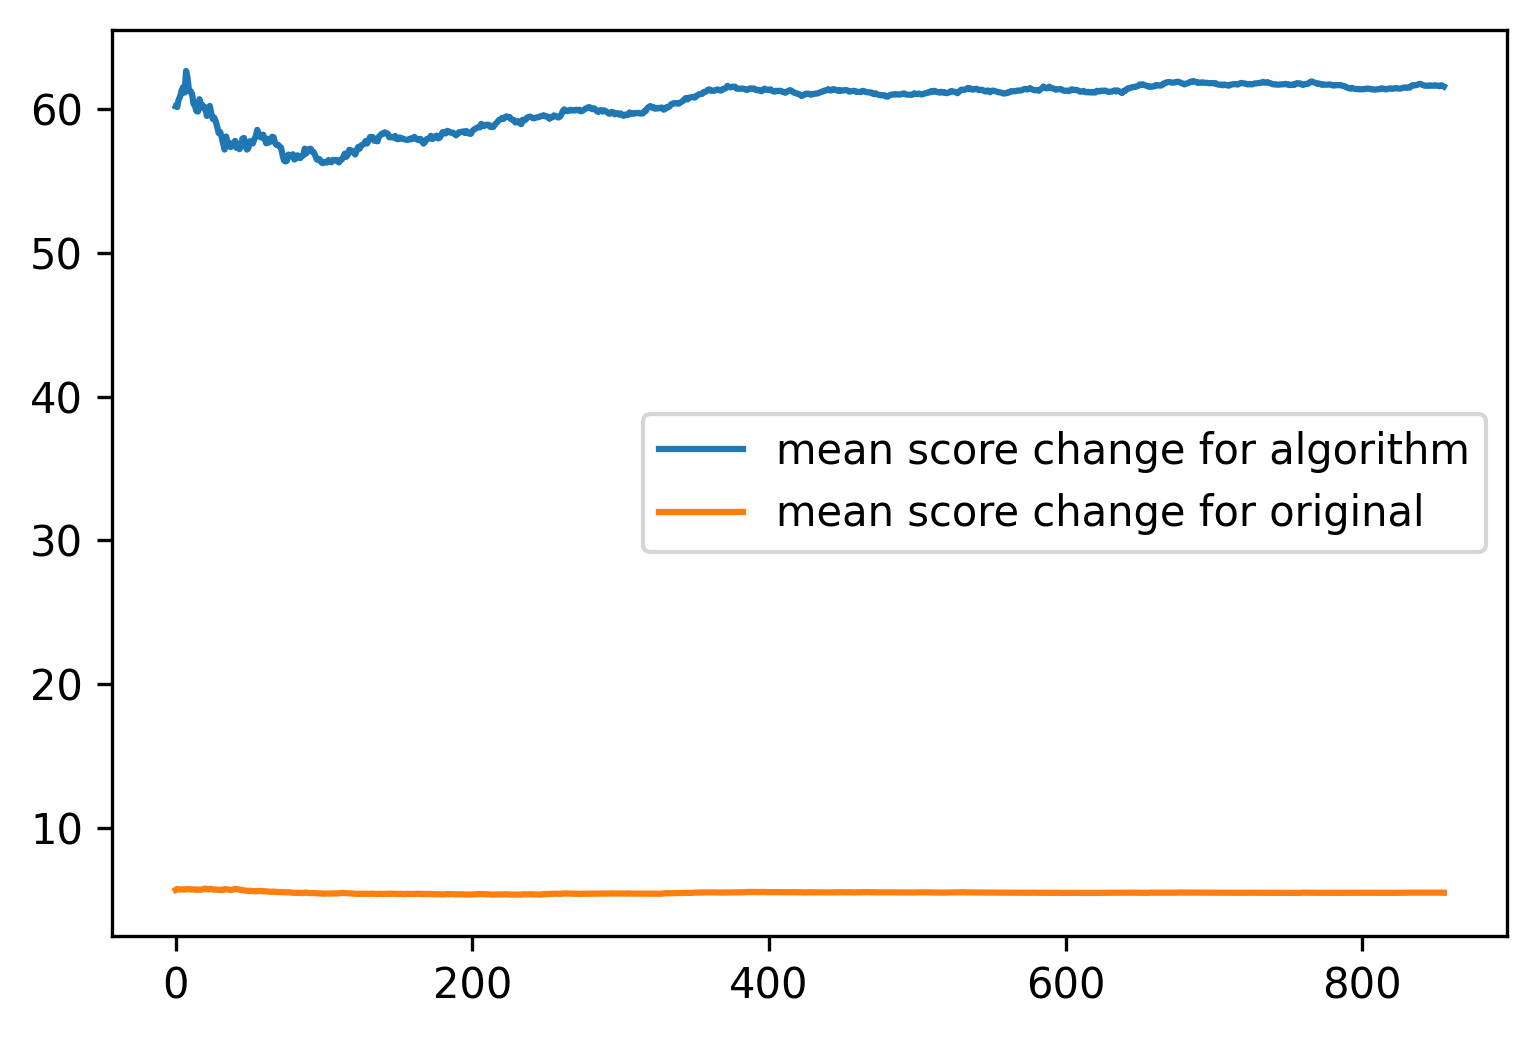

In [5]:
my_score_speed = res[:, 1]
org_score_speed = res[:, 0]

x = np.arange(0, len(res), 1)

plt.figure(dpi=300)

plt.plot(x, my_score_speed, label='mean score change for algorithm')
plt.plot(x, org_score_speed, label='mean score change for original')

plt.legend()

plt.show()

In [6]:
img_size = (1000, 1000)

In [7]:
lane_width = 350
line_width = 18
start_x = x = 100

In [8]:
rng = np.random.default_rng(4)

In [9]:
# lane_width = rng.integers(low=350, high=401)
# line_width = rng.integers(low=10, high=20)
# start_x = x = rng.integers(low=0, high=200)

In [10]:
img = np.zeros((img_size[0], img_size[1], 3), np.uint8)

In [11]:
lines = []
for i in range(3):
    lines.append(Line(Point(x, 0), Point(x, img_size[1])))
    x += lane_width

In [12]:
for line in lines:
    cv2.line(img, line.start(), line.end(), color=(255,255,255), thickness=line_width)

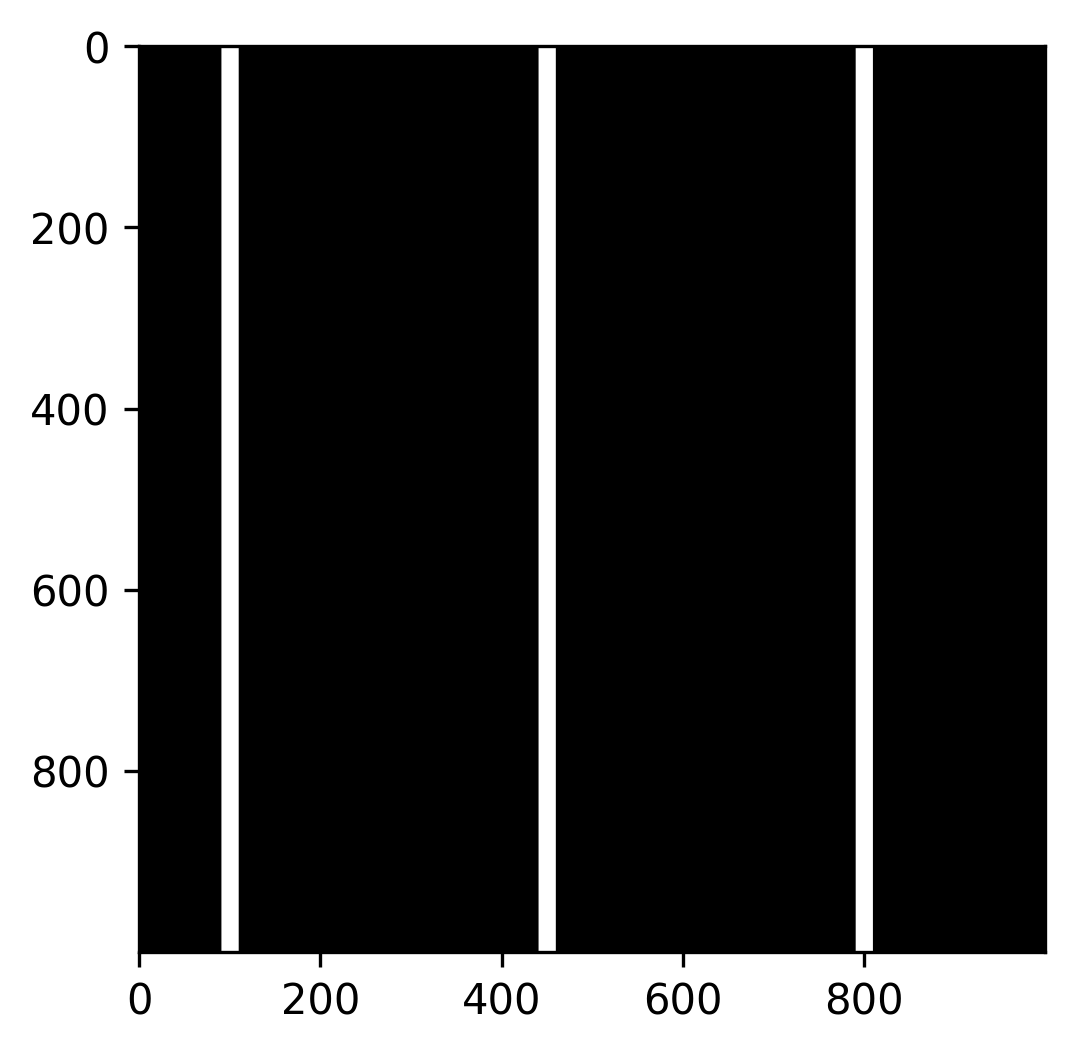

In [13]:

plt.figure(dpi=300)
plt.imshow(img)
plt.show()

In [14]:
src = np.float32([lines[0].start(),
                  lines[2].start(),
                  lines[0].end(),
                  lines[2].end()])

# dst = np.float32([(lines[0].start()[0] + 200, lines[0].start()[1]),
#                   (lines[2].start()[0] - 200, lines[2].start()[1]),
#                   (lines[0].end()[0] - 1000, lines[0].end()[1]),   
#                   (lines[2].end()[0] + 1000, lines[2].end()[1])])



In [15]:
# M = cv2.getPerspectiveTransform(src, dst)

In [16]:
M, dst = gen_Matrice(src, rng)

In [17]:
M

array([[ 9.57142857e-02, -4.25679272e-01,  3.91428571e+02],
       [ 0.00000000e+00,  2.34593838e-02,  0.00000000e+00],
       [-0.00000000e+00, -9.76540616e-04,  1.00000000e+00]])

In [18]:
warped_img = cv2.warpPerspective(img, M, (int(dst[3][0]), int(dst[3][1])))

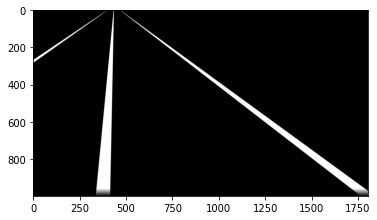

In [19]:
plt.imshow(warped_img)
plt.show()

In [20]:
M_inv = np.linalg.inv(M)

In [21]:
M_inv

array([[ 1.04477612e+01,  1.93432836e+01, -4.08955224e+03],
       [ 0.00000000e+00,  4.26268657e+01,  0.00000000e+00],
       [ 0.00000000e+00,  4.16268657e-02,  1.00000000e+00]])

In [22]:
restored_img = cv2.warpPerspective(warped_img, M_inv, img_size)

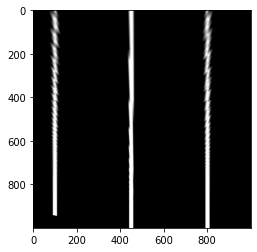

In [23]:
plt.imshow(restored_img)
plt.show()

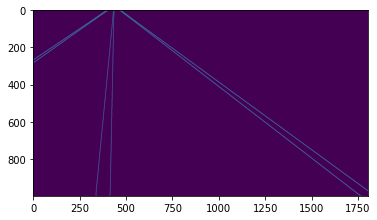

In [24]:
plt.imshow(Canny(warped_img))
plt.show()

In [25]:
pos_lines = find_lines(warped_img)

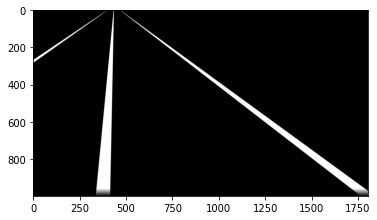

In [26]:
plt.imshow(warped_img)
plt.show()

In [27]:
hsl = cv2.cvtColor(warped_img, cv2.COLOR_BGR2HLS)

In [28]:
lower = np.array([200, 200, 200], dtype="uint8")
upper = np.array([255, 255, 255], dtype="uint8")
lines_mask = cv2.inRange(warped_img, lower, upper)
lines_mask_copy = cv2.bitwise_and(warped_img, warped_img, mask = lines_mask)

In [29]:
white_lines = find_white_lines_by_segments(pos_lines, lines_mask_copy)

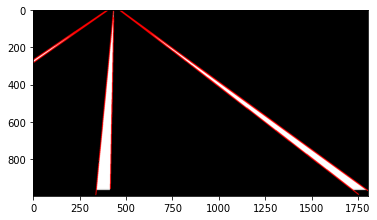

In [30]:
copy = np.copy(lines_mask_copy)
draw_lines(white_lines, copy)
plt.imshow(copy)
plt.show()

In [31]:
len(white_lines)

28

In [32]:
white_lines = merge_lines(white_lines, (lines_mask_copy.shape[1], lines_mask_copy.shape[0]))

In [33]:
(lines_mask_copy.shape[1], lines_mask_copy.shape[0])

(1804, 1000)

In [34]:
white_lines

[[467, 0, 1803, 970], [400, 0, 0, 269], [434, 0, 334, 999]]

In [35]:
draw_lines(white_lines, lines_mask_copy)

In [36]:
len(white_lines)

3

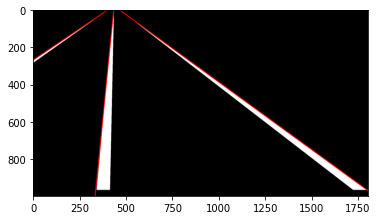

In [37]:
plt.imshow(lines_mask_copy)
plt.show()

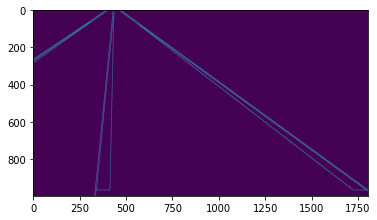

In [38]:
plt.imshow(Canny(lines_mask_copy))
plt.show()

In [39]:
custom_M_inv, debug_img, restored_img_size = calc_transformation_matrix_v5(white_lines, warped_img)

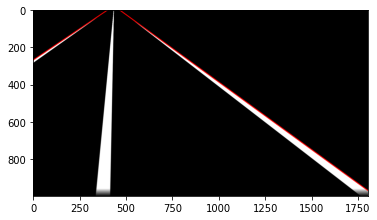

In [40]:
plt.imshow(debug_img)
plt.show()

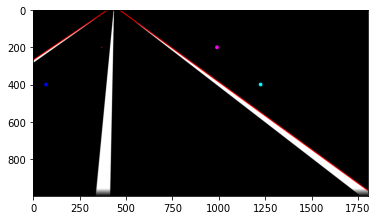

In [41]:
circ = np.copy(debug_img)
# cv2.circle(circ, (590, 800), 10, (255, 0, 0), -1)
# cv2.circle(circ, (625, 600), 10, (0, 0, 255), -1)
# cv2.circle(circ, (1710, 800), 10, (255, 0, 255), -1)
# cv2.circle(circ, (1470, 600), 10, (0, 255, 255), -1)
cv2.circle(circ, (370, 200), 3, (255, 0, 0), -1)
cv2.circle(circ, (70, 400), 10, (0, 0, 255), -1)
cv2.circle(circ, (990, 200), 10, (255, 0, 255), -1)
cv2.circle(circ, (1225, 400), 10, (0, 255, 255), -1)
plt.imshow(circ)
plt.show()

In [42]:
custom_M_inv

array([[ 1.32355673e+01,  2.37097404e+01, -5.16793298e+03],
       [-4.45201730e-04,  7.83898053e+01,  1.00000000e+02],
       [-4.45201730e-06,  4.12634646e-02,  1.00000000e+00]])

In [43]:
M_inv

array([[ 1.04477612e+01,  1.93432836e+01, -4.08955224e+03],
       [ 0.00000000e+00,  4.26268657e+01,  0.00000000e+00],
       [ 0.00000000e+00,  4.16268657e-02,  1.00000000e+00]])

In [44]:
restored_img_size

(1115, 1750)

In [45]:
custom_restored_img = cv2.warpPerspective(warped_img, custom_M_inv, restored_img_size)

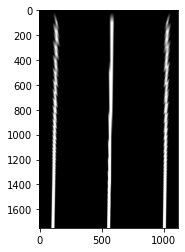

In [46]:
plt.imshow(custom_restored_img)
plt.show()

In [47]:
start, delta, width = get_parameters(custom_restored_img)
start, delta, width

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
start_x, line_width, lane_width

NameError: name 'start_x' is not defined

In [ ]:
abs(start - start_x) + abs(delta - line_width) + abs(lane_width - width)

In [ ]:
custom_M_inv_inv =  np.linalg.inv(custom_M_inv)

In [ ]:
res_res_img = cv2.warpPerspective(custom_restored_img, custom_M_inv_inv, (2000, 1000))

In [ ]:
plt.imshow(res_res_img)
plt.show()

In [ ]:
noise = random_noise(warped_img, 's&p', amount=0.15)

In [ ]:
plt.imshow(noise)
plt.show()

In [ ]:
noise = np.array(noise, dtype=np.uint8)

In [ ]:
noisy_img = warped_img + noise

In [ ]:
noisy_img.shape

In [ ]:
plt.imshow(noisy_img)
plt.show()

In [ ]:
noise = rng.integers(low=0, high=256, size=(warped_img.shape[0], warped_img.shape[1]), dtype=np.uint8)

In [ ]:
noisy_img[noise>=220] = [255,255,255]
noisy_img[noise<220] = [0,0,0]

In [ ]:
noisy_img = noisy_img + warped_img

In [ ]:
plt.imshow(noisy_img)
plt.show()